<a href="https://colab.research.google.com/github/AlfredoLSN/Segmentacao_de_Clientes/blob/main/Departamento_de_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Departamento de marketing

- Dados: https://www.kaggle.com/arjunbhasin2013/ccdata


## Importação das bibliotecas e base de dados

In [ ]:
!pip install xlwt

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
creditCard_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Science - Empresas/Departamento Marketing/Marketing_data.csv")
creditCard_df.shape

(8950, 18)

In [3]:
creditCard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
creditCard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
creditCard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## Visualização e exploração dos dados

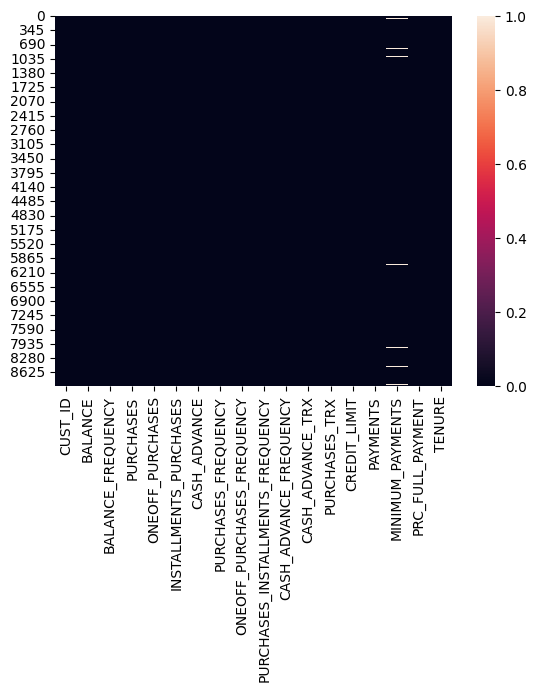

In [6]:
sns.heatmap(creditCard_df.isnull());

In [7]:
creditCard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
 creditCard_df["MINIMUM_PAYMENTS"].mean()

864.2065423050828

In [9]:
creditCard_df.loc[(creditCard_df["MINIMUM_PAYMENTS"].isnull() == True), "MINIMUM_PAYMENTS"] = creditCard_df["MINIMUM_PAYMENTS"].mean()

In [10]:
creditCard_df["CREDIT_LIMIT"].mean()

4494.449450364621

In [11]:
creditCard_df.loc[(creditCard_df["CREDIT_LIMIT"].isnull() == True), "CREDIT_LIMIT"] = creditCard_df["CREDIT_LIMIT"].mean()

In [12]:
creditCard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

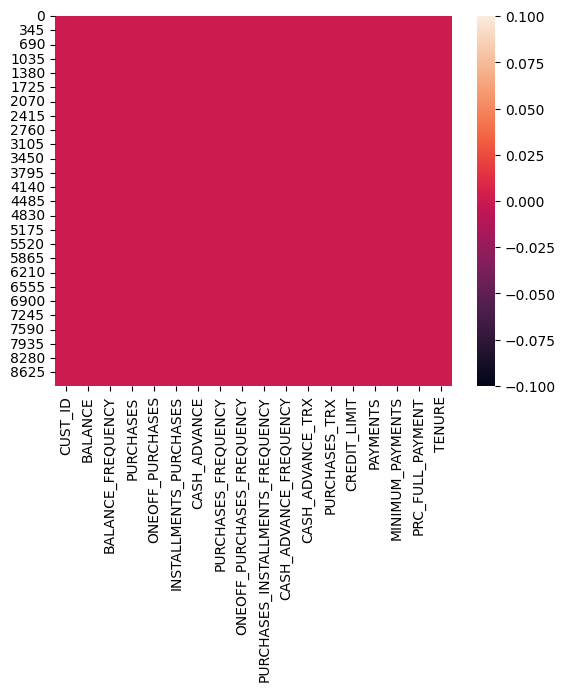

In [13]:
sns.heatmap(creditCard_df.isnull());

In [14]:
creditCard_df.duplicated().sum()

0

In [15]:
creditCard_df.drop("CUST_ID", axis = 1, inplace = True)

In [16]:
creditCard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [17]:
creditCard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

<ipython-input-18-327e7ff361a0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditCard_df[creditCard_df.columns[i]], kde = True);
<ipython-input-18-327e7ff361a0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditCard_df[creditCard_df.columns[i]], kde = True);
<ipython-input-18-327e7ff3

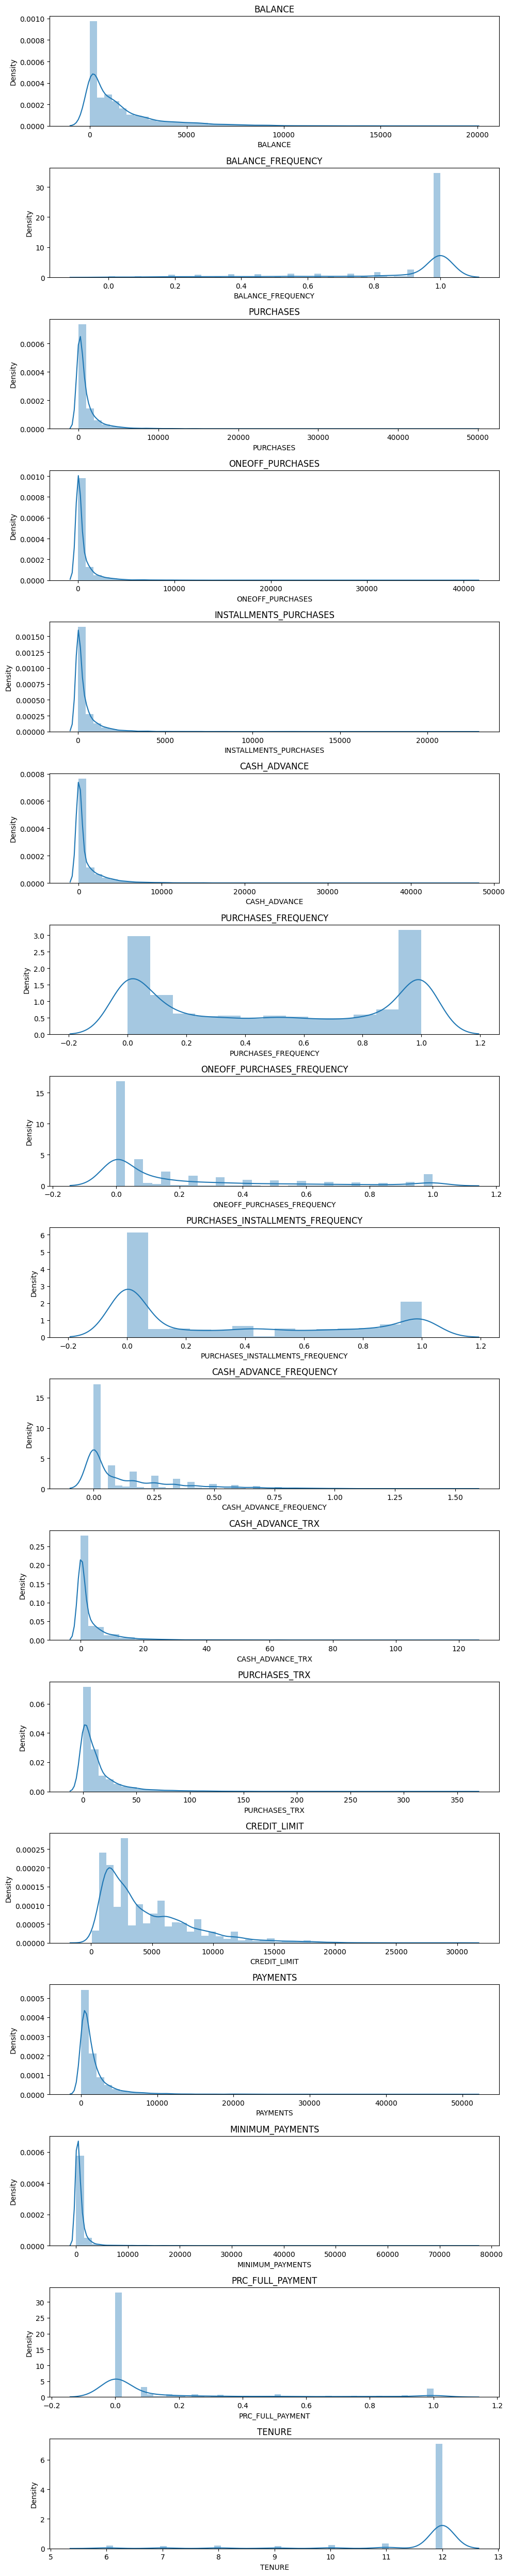

In [18]:
plt.figure(figsize=(10,50))
for i in range(len(creditCard_df.columns)):
  plt.subplot(17, 1, i + 1);
  sns.distplot(creditCard_df[creditCard_df.columns[i]], kde = True);
  plt.title(creditCard_df.columns[i]);
plt.tight_layout();

In [19]:
correlations = creditCard_df.corr()

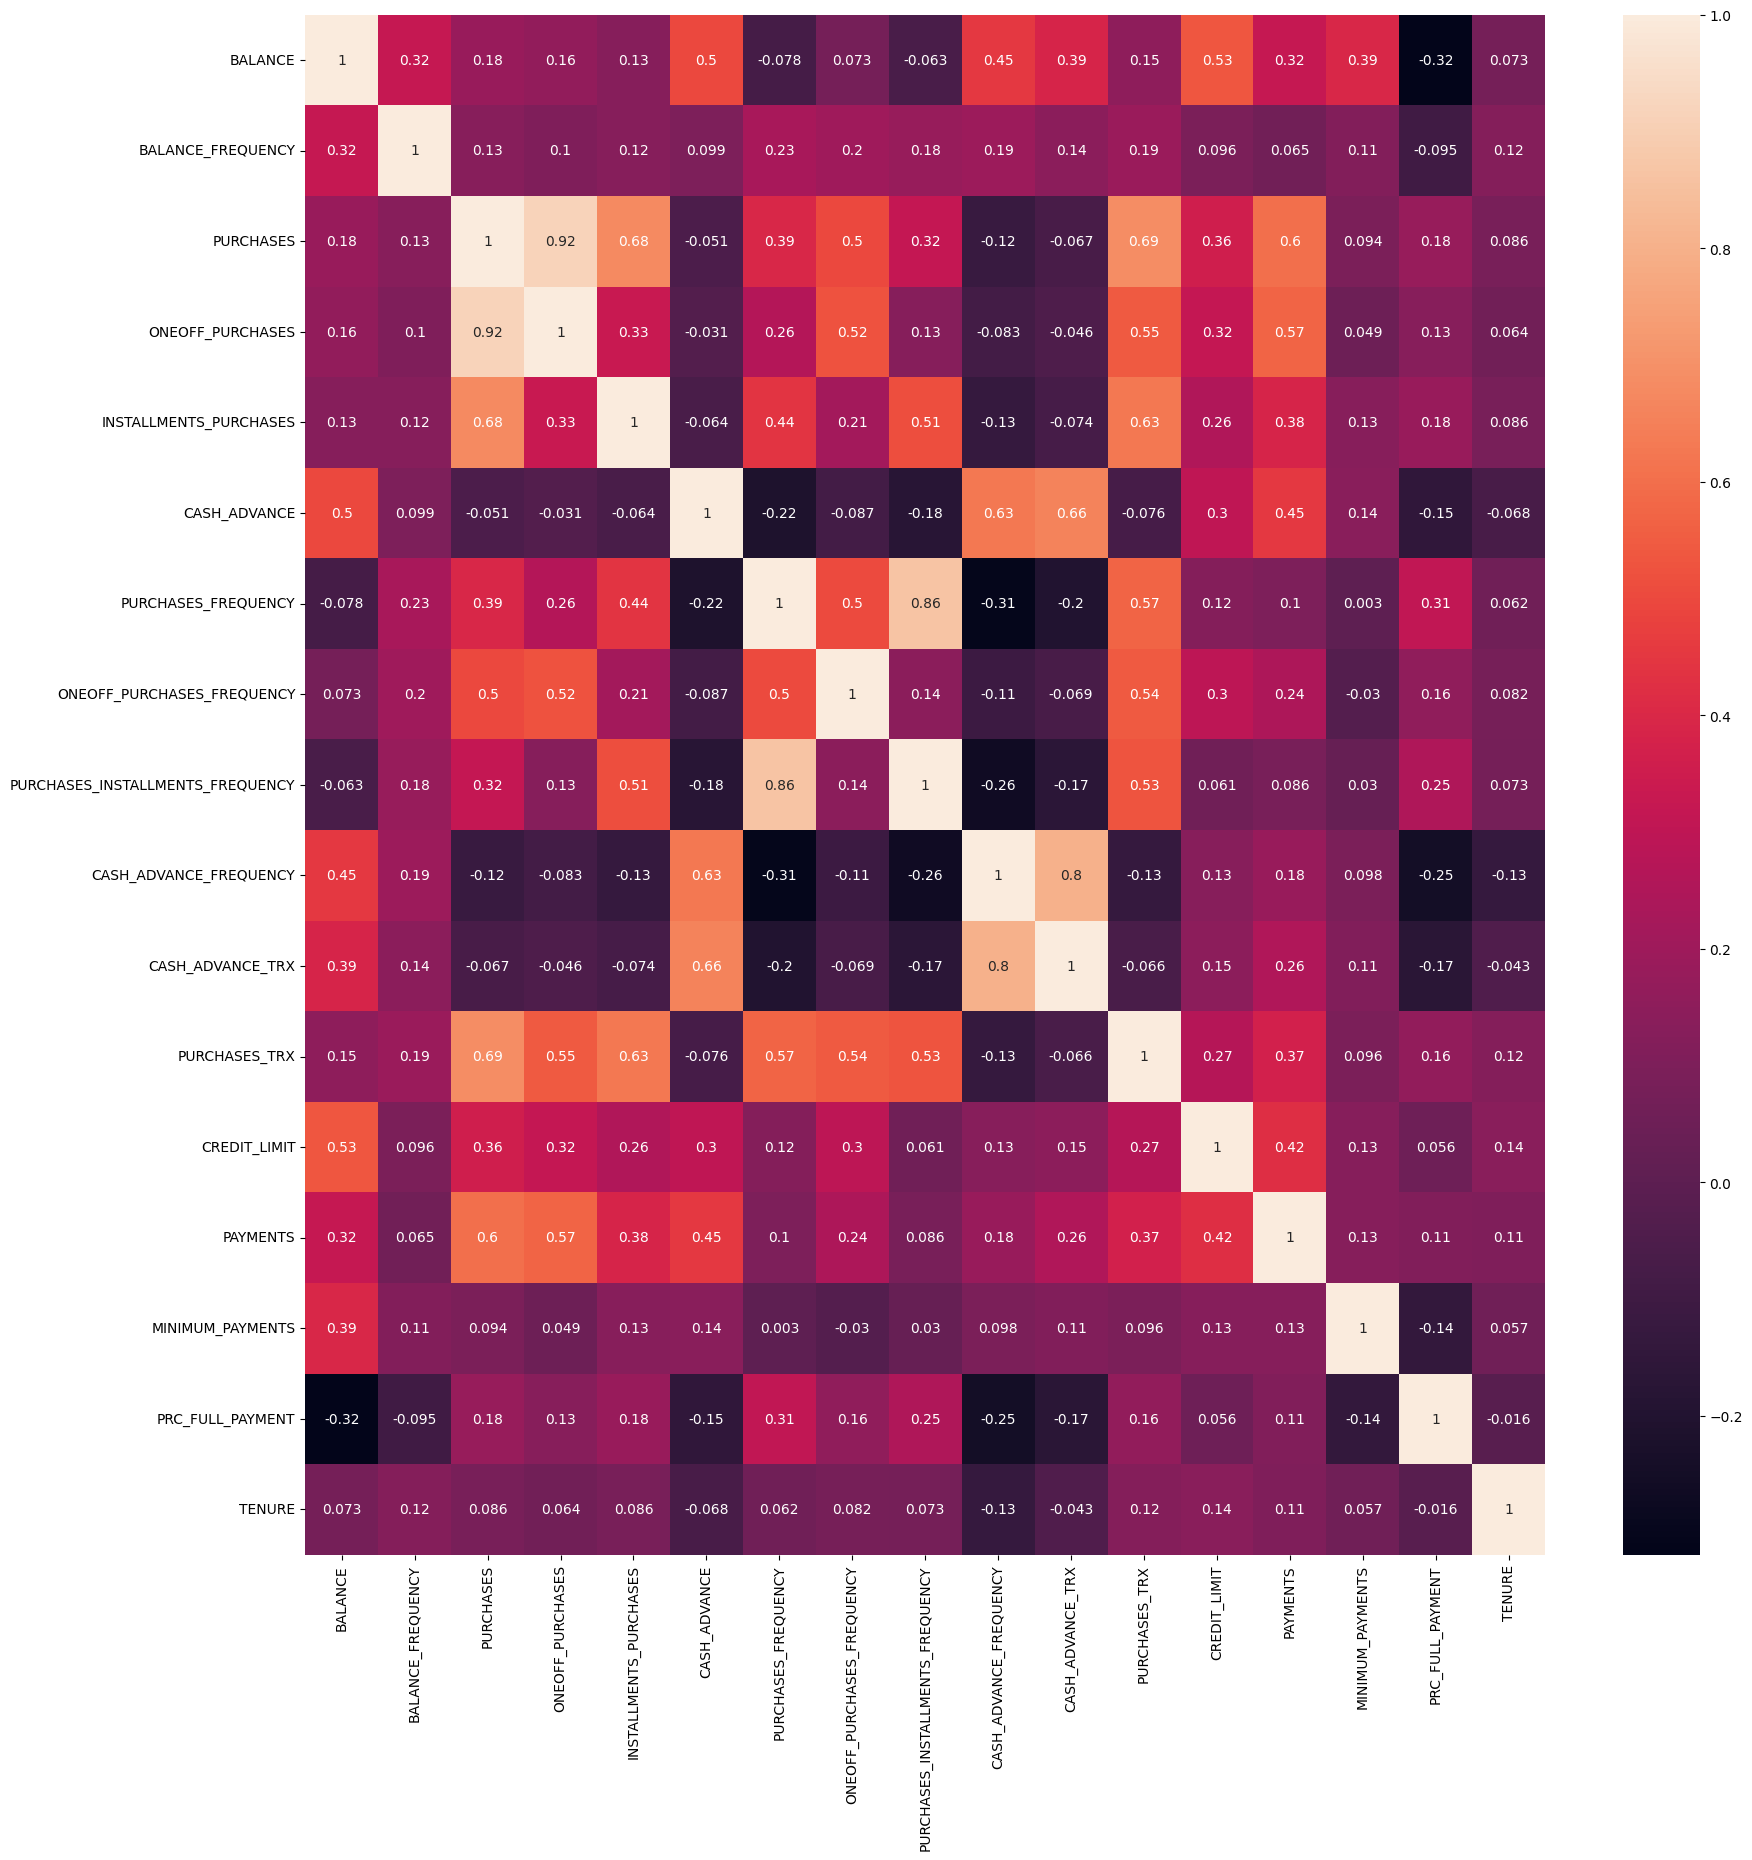

In [20]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot = True);

## Definição do número de clusters usando o Elbow Method

- Mais detalhes
  - https://en.wikipedia.org/wiki/Elbow_method_(clustering)
  - https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [21]:
max(creditCard_df["BALANCE"]), max(creditCard_df["PURCHASES_FREQUENCY"])

(19043.13856, 1.0)

In [22]:
scaler = StandardScaler()
creditCard_df_scaled = scaler.fit_transform(creditCard_df)

In [23]:
min(creditCard_df_scaled[0]), max(creditCard_df_scaled[0])

(-0.9604333444542572, 0.36067954425377496)

In [24]:
wcss_1 = []
range_values = range(1,20)
for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(creditCard_df_scaled)
  wcss_1.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [25]:
print(wcss_1)

[152149.99999999983, 127784.81423417776, 111986.76701120174, 99074.3704938636, 91503.39081843363, 84851.13240432573, 79755.97153971368, 74624.39101295918, 69857.10891225241, 66485.34624141264, 63633.198744833106, 61362.08903637714, 59151.941763456816, 57480.13481705151, 56165.54015194651, 54703.216236191685, 52996.785316151945, 52058.044428134104, 50566.1998995728]


Text(0, 0.5, 'WCSS')

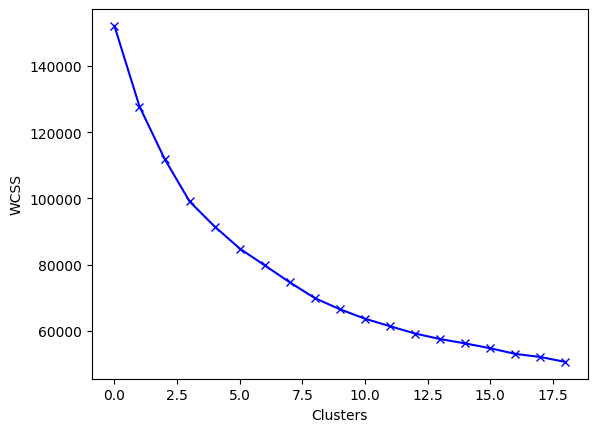

In [26]:
plt.plot(wcss_1, "bx-")
plt.xlabel("Clusters")
plt.ylabel("WCSS")

## Agrupamento com k-means

In [27]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(creditCard_df_scaled)
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [28]:
labels, len(labels)

(array([5, 2, 1, ..., 0, 0, 0], dtype=int32), 8950)

In [29]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([ 625, 1121,  887, 2006, 1182, 2745,   25,  359]))

In [30]:
kmeans.cluster_centers_

array([[-3.34591856e-01, -3.50523523e-01, -2.88488966e-01,
        -2.14651840e-01, -2.87412119e-01,  6.73639269e-02,
        -2.04977503e-01, -2.87181005e-01, -2.26362940e-01,
         3.08492983e-01,  3.47756747e-04, -3.88193246e-01,
        -5.62450856e-01, -3.93054013e-01, -2.08752879e-01,
         1.25155600e-02, -3.19977526e+00],
       [-1.31265510e-01,  3.99815117e-01,  5.42445611e-01,
         6.71502791e-01,  4.87523318e-02, -3.29380950e-01,
         9.81975192e-01,  1.90238261e+00,  1.76757388e-01,
        -4.13015898e-01, -3.30841089e-01,  6.19163066e-01,
         4.39372470e-01,  1.50162606e-01, -1.58074446e-01,
         4.46026458e-01,  2.68690888e-01],
       [ 1.66109560e+00,  3.96002002e-01, -2.26434380e-01,
        -1.61786810e-01, -2.38235342e-01,  1.98872662e+00,
        -4.90106932e-01, -2.15469958e-01, -4.28866317e-01,
         1.91612353e+00,  1.91289468e+00, -2.76288145e-01,
         1.00656971e+00,  7.88707208e-01,  5.15634789e-01,
        -3.95736771e-01,  7.3

In [31]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditCard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.334592,-0.350524,-0.288489,-0.214652,-0.287412,0.067364,-0.204978,-0.287181,-0.226363,0.308493,0.000348,-0.388193,-0.562451,-0.393054,-0.208753,0.012516,-3.199775
1,-0.131266,0.399815,0.542446,0.671503,0.048752,-0.329381,0.981975,1.902383,0.176757,-0.413016,-0.330841,0.619163,0.439372,0.150163,-0.158074,0.446026,0.268691
2,1.661096,0.396002,-0.226434,-0.161787,-0.238235,1.988727,-0.490107,-0.215470,-0.428866,1.916124,1.912895,-0.276288,1.006570,0.788707,0.515635,-0.395737,0.073732
3,-0.364301,0.332655,-0.034524,-0.242836,0.364312,-0.362128,0.996649,-0.383954,1.209063,-0.472342,-0.359557,0.190428,-0.261925,-0.215368,-0.042811,0.318896,0.255634
4,-0.700882,-2.141259,-0.310150,-0.234650,-0.302135,-0.320253,-0.554333,-0.441826,-0.439618,-0.521281,-0.376272,-0.419128,-0.173139,-0.191321,-0.256691,0.286741,0.202634
5,0.006269,0.403585,-0.356019,-0.240962,-0.399001,-0.103557,-0.847516,-0.391774,-0.751101,0.088423,-0.038865,-0.480148,-0.308380,-0.253964,-0.012540,-0.456080,0.274082
6,1.819469,0.301643,12.207777,12.296446,6.272587,0.242957,1.002411,2.032081,0.866148,-0.392172,-0.124384,4.369530,3.261192,8.782991,1.003073,1.152351,0.300900
7,1.052250,0.467735,2.453680,1.792046,2.509454,-0.155439,1.167125,1.545767,1.275155,-0.279918,-0.145446,3.107468,1.281050,1.427375,0.691944,0.244117,0.337784


In [32]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditCard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,868.050123,0.794235,386.843712,236.159280,151.164432,1120.136414,0.408083,0.116786,0.274475,0.196877,3.251200,5.060800,2448.023119,595.290996,377.716763,0.157375,7.235200
1,1291.256750,0.971983,2162.148243,1706.994469,455.153773,288.143873,0.884465,0.769975,0.434685,0.052496,0.991079,30.099911,6093.066256,2167.849882,495.820713,0.284170,11.876896
2,5021.905112,0.971080,519.424291,323.904403,195.634381,5149.323728,0.293647,0.138179,0.193995,0.518580,16.302928,7.842342,8156.761876,4016.373940,2065.871666,0.037968,11.615991
3,806.213189,0.956074,929.443445,189.378599,740.510150,219.471650,0.890354,0.087917,0.844950,0.040624,0.795115,19.443170,3541.460719,1109.674421,764.438410,0.246986,11.859422
4,105.647726,0.370026,340.565474,202.965761,137.850812,307.286565,0.267870,0.070652,0.189722,0.030830,0.681049,4.291878,3864.500376,1179.288237,265.999116,0.237582,11.788494
5,1577.522680,0.972876,242.565200,192.489996,50.255554,761.707752,0.150202,0.085584,0.065931,0.152838,2.983601,2.775146,3372.436832,997.942042,834.982712,0.020319,11.884111
6,5351.546106,0.948727,27085.309200,21002.018800,6083.290400,1488.363253,0.892667,0.808667,0.708667,0.056667,2.400000,123.320000,16360.000000,27159.043527,3201.825604,0.490758,11.920000
7,3754.645316,0.988073,6245.530390,3566.866267,2680.335432,652.909310,0.958774,0.663590,0.871216,0.079130,2.256267,91.949861,9155.431755,5865.254009,2476.751842,0.225115,11.969359


In [33]:
labels, len(labels)

(array([5, 2, 1, ..., 0, 0, 0], dtype=int32), 8950)

In [34]:
creditCard_df_cluster = pd.concat([creditCard_df, pd.DataFrame({"cluster": labels})], axis = 1)
creditCard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,5
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,5
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,5


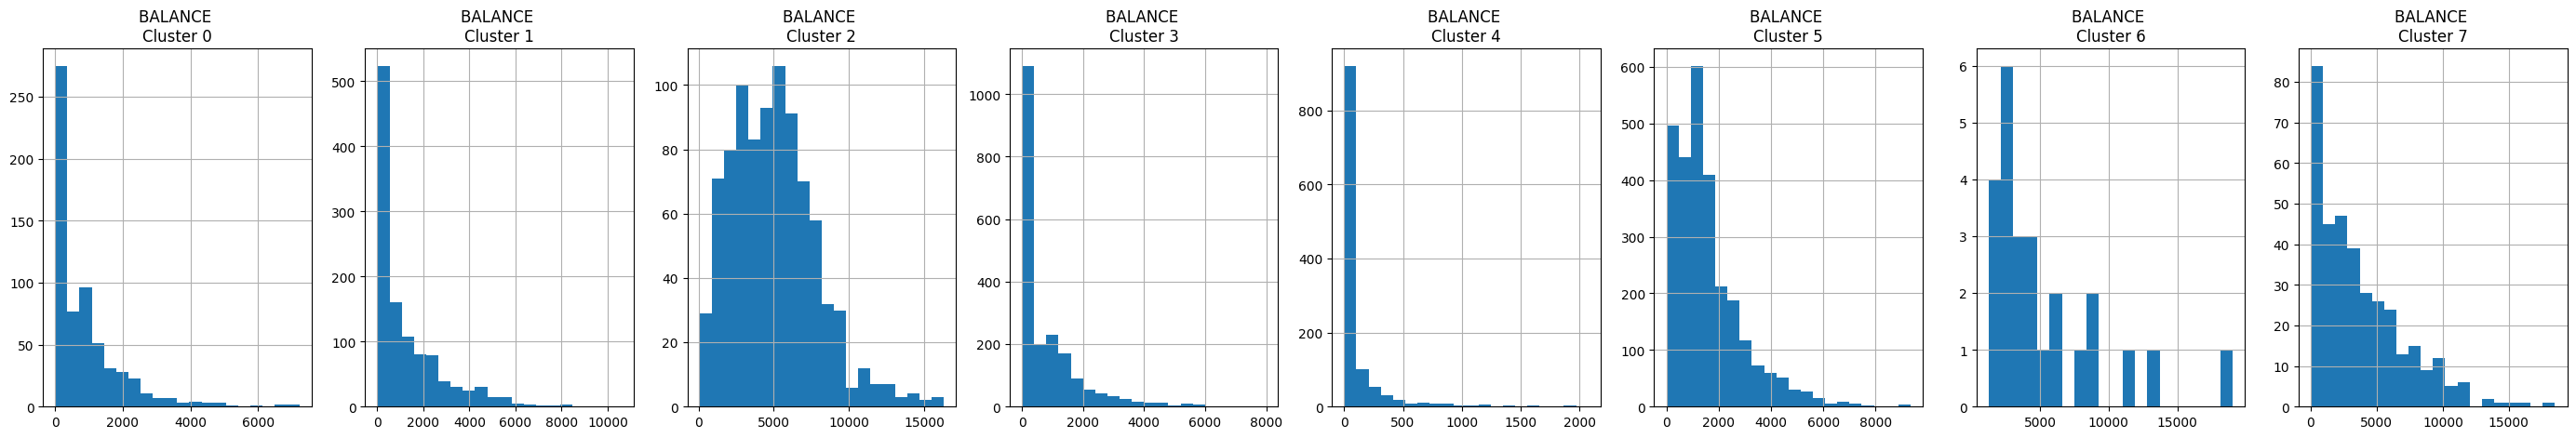

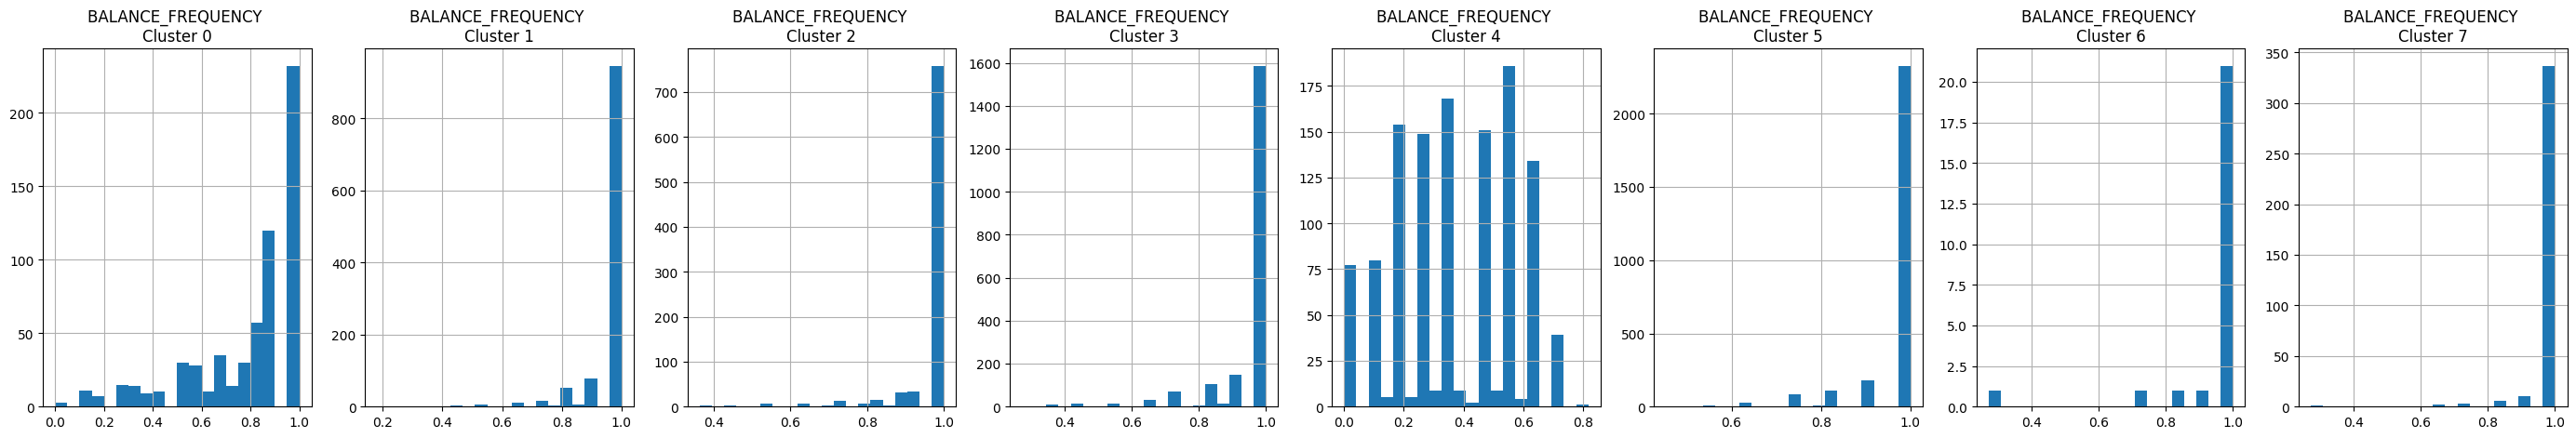

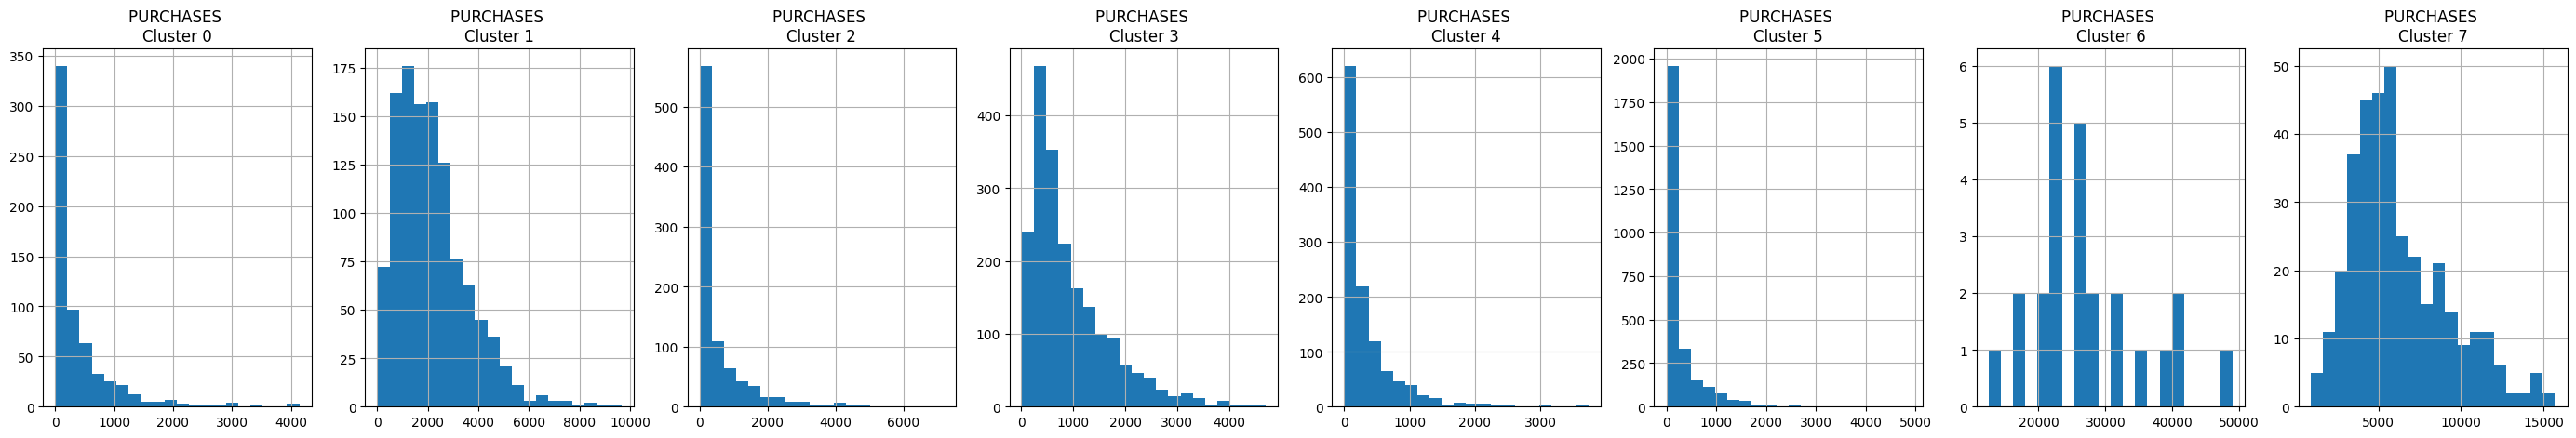

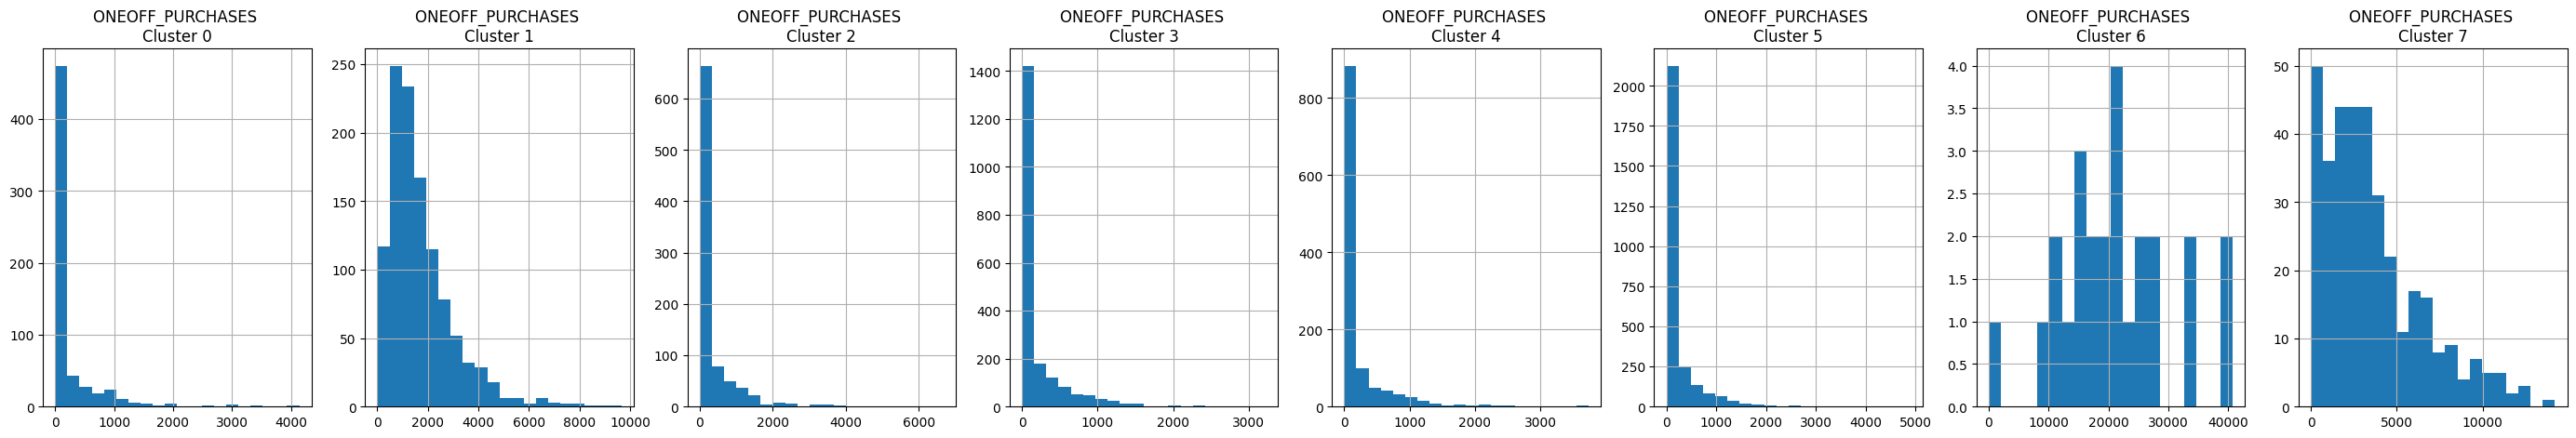

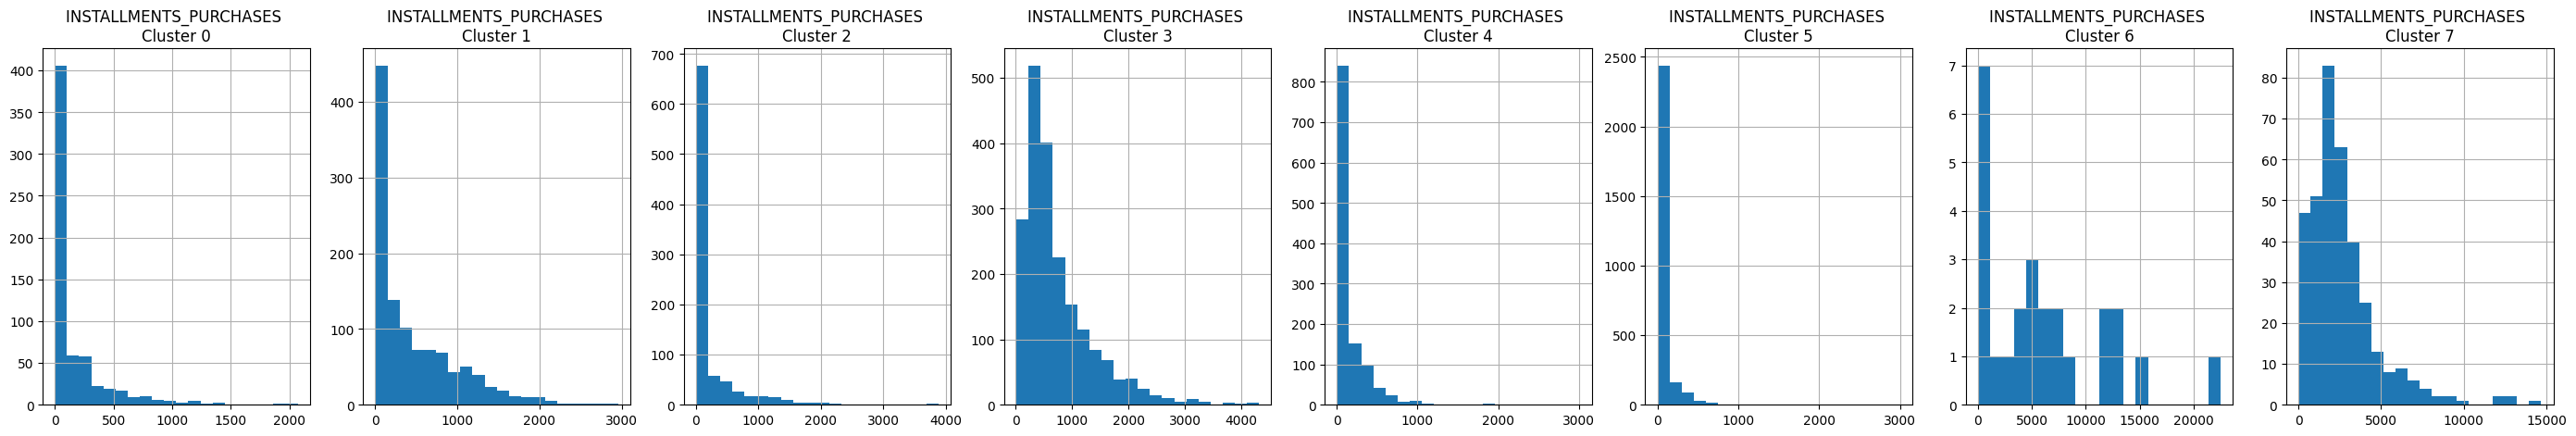

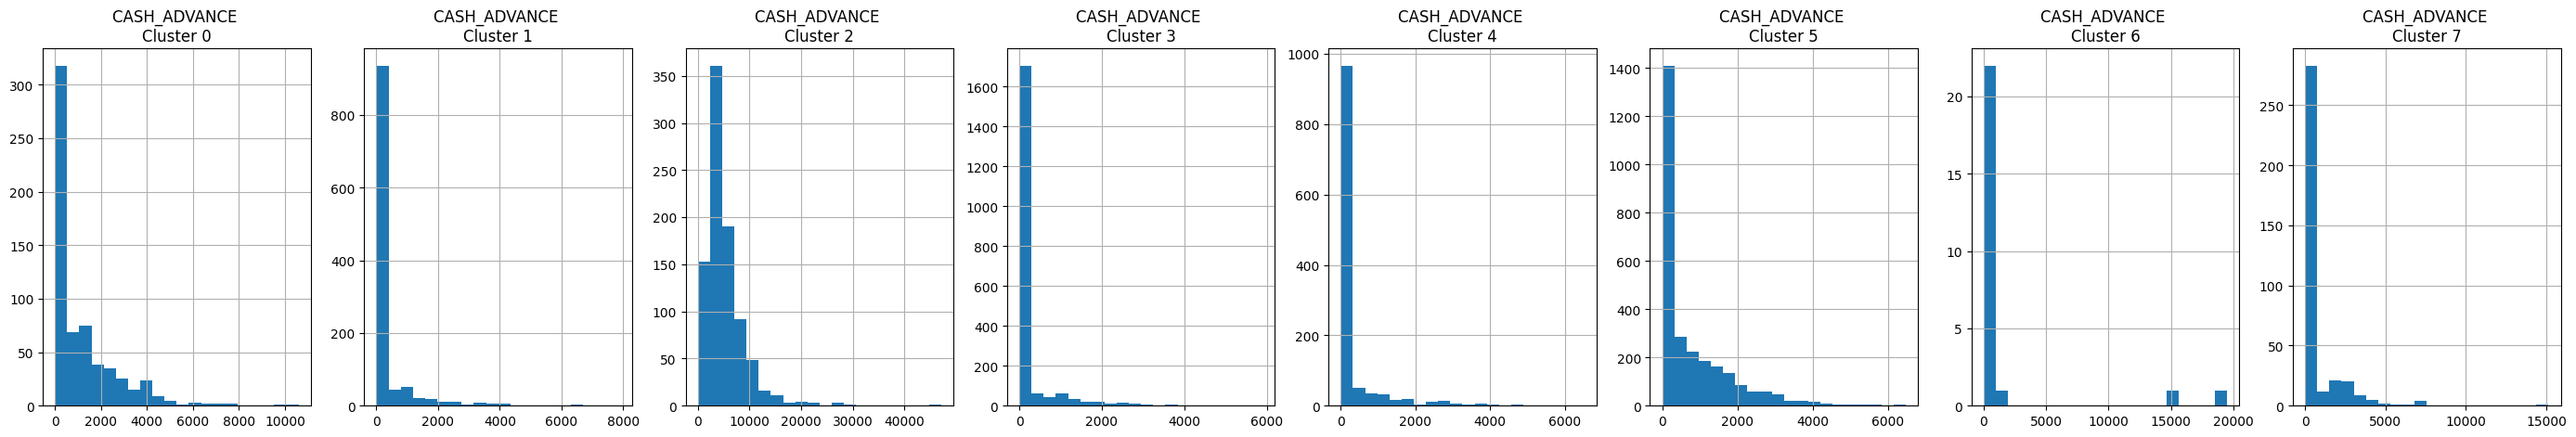

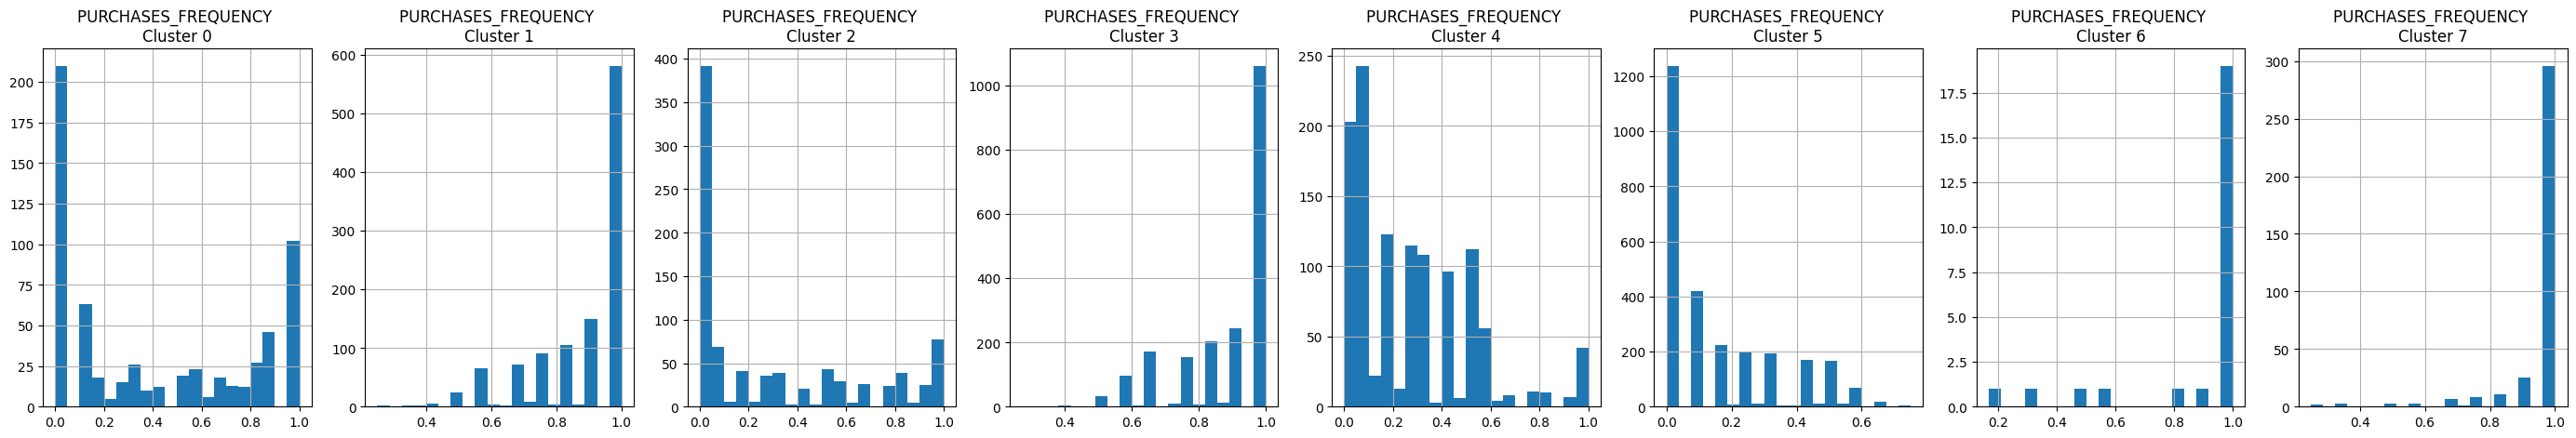

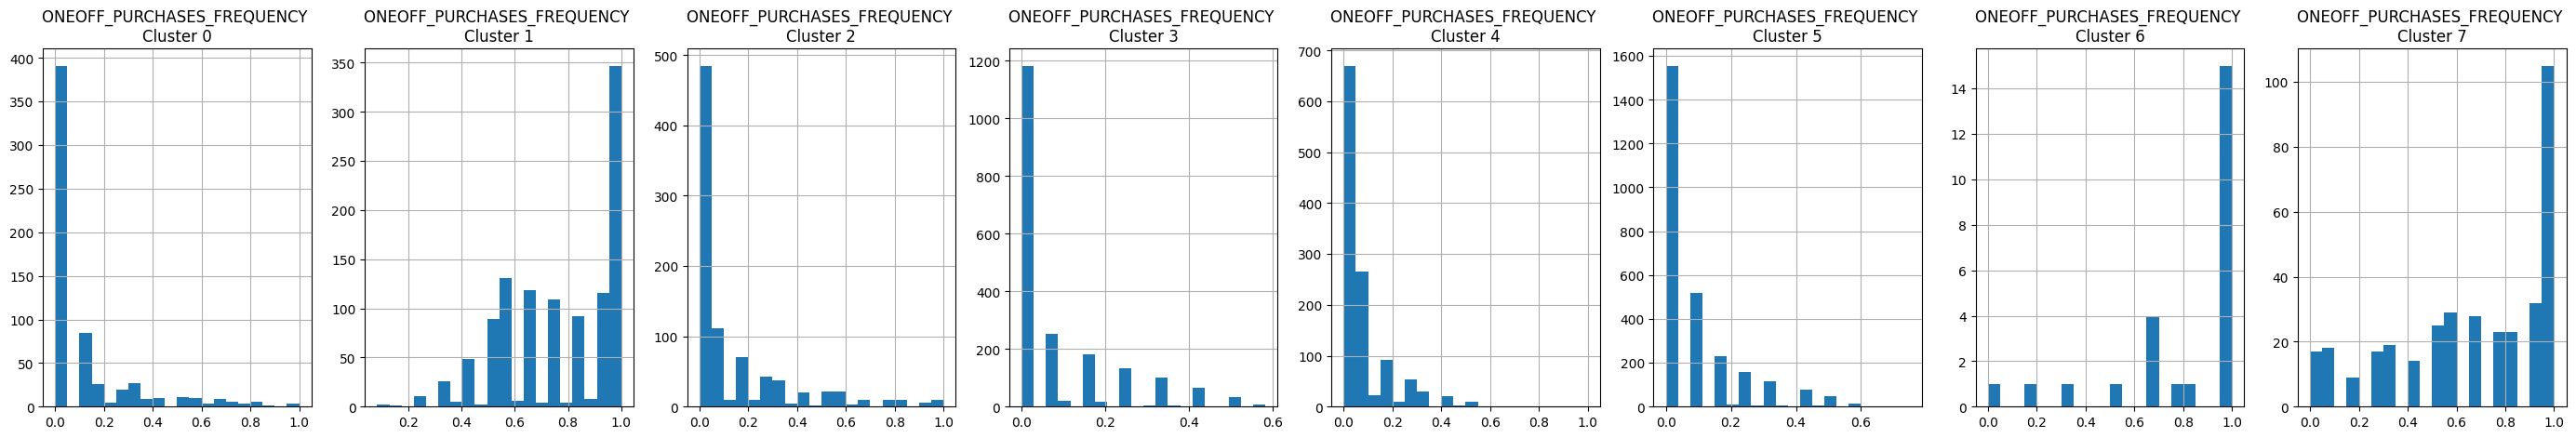

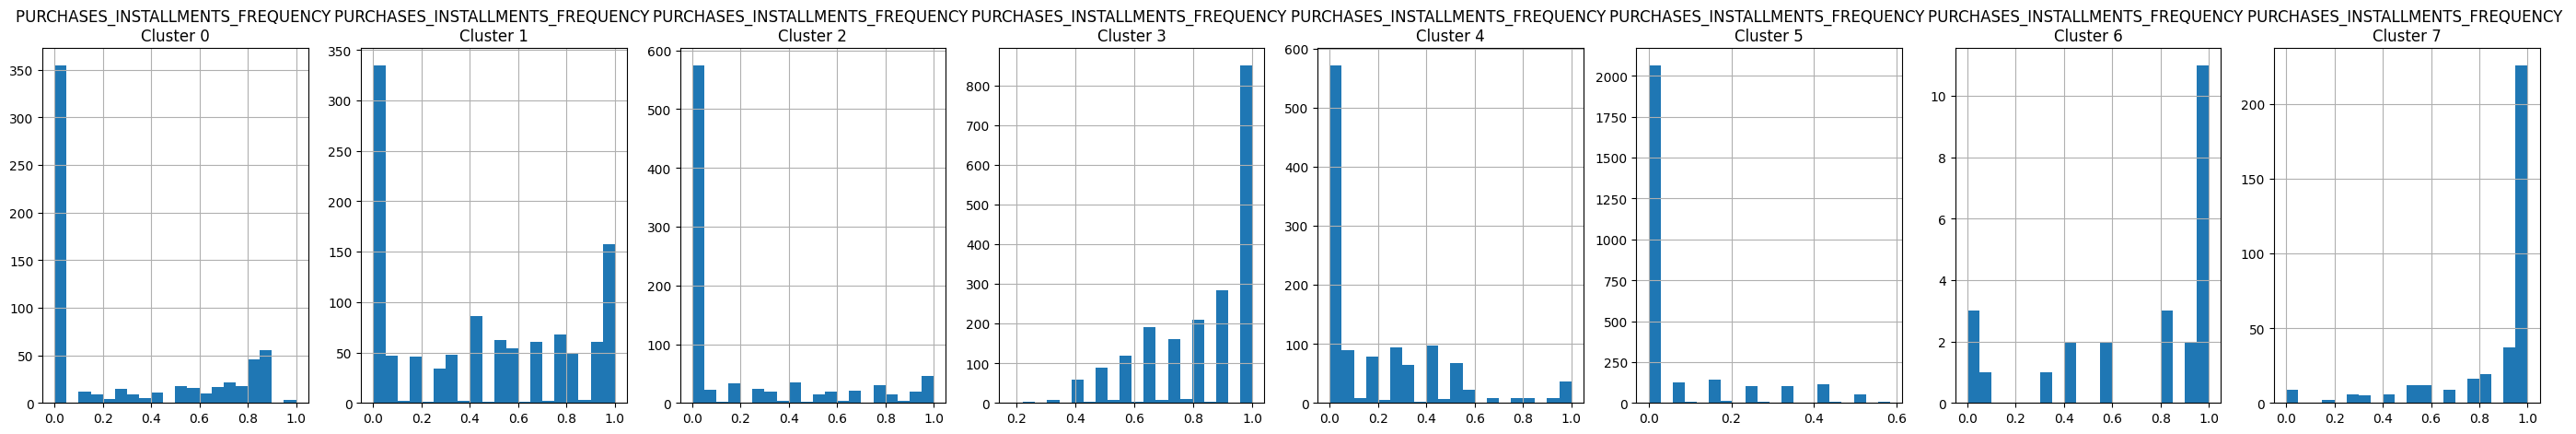

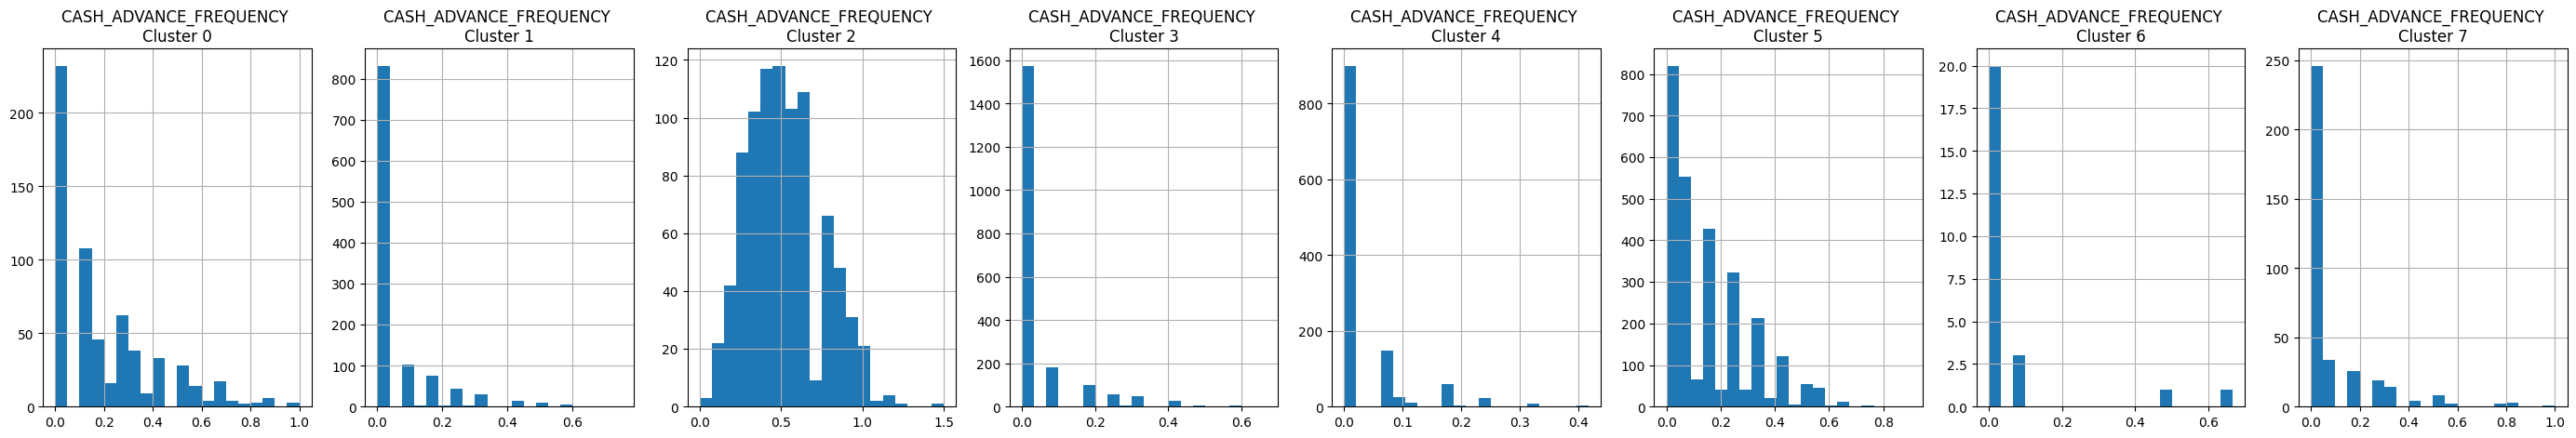

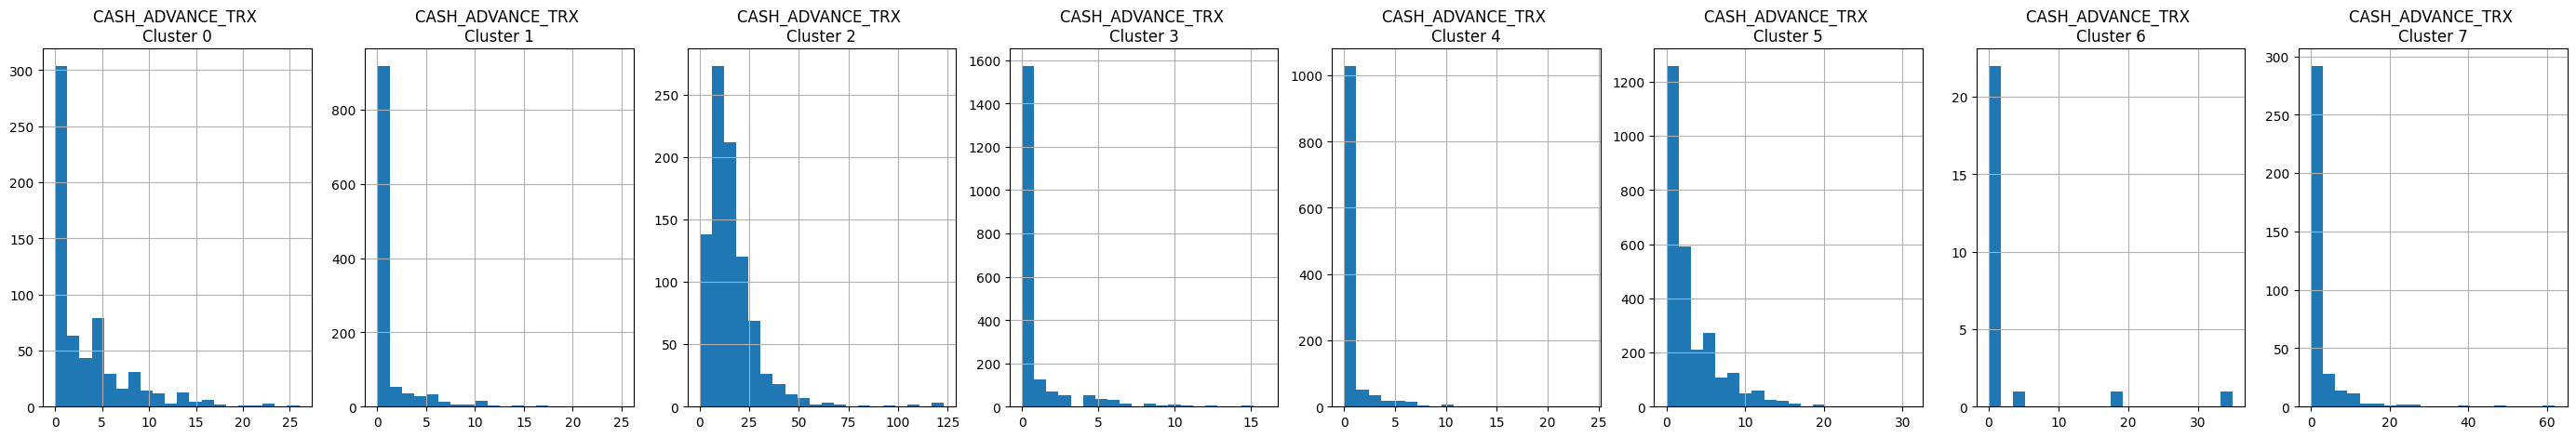

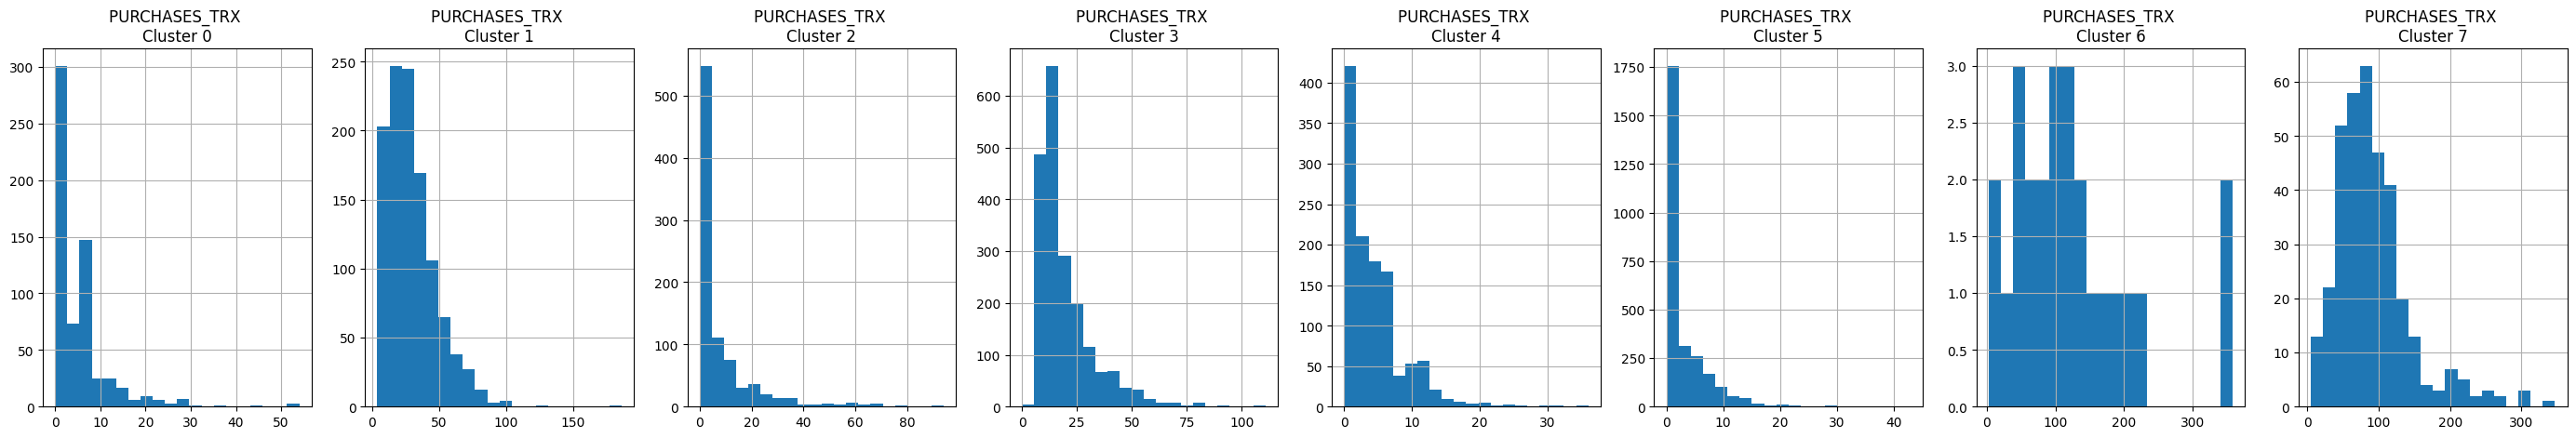

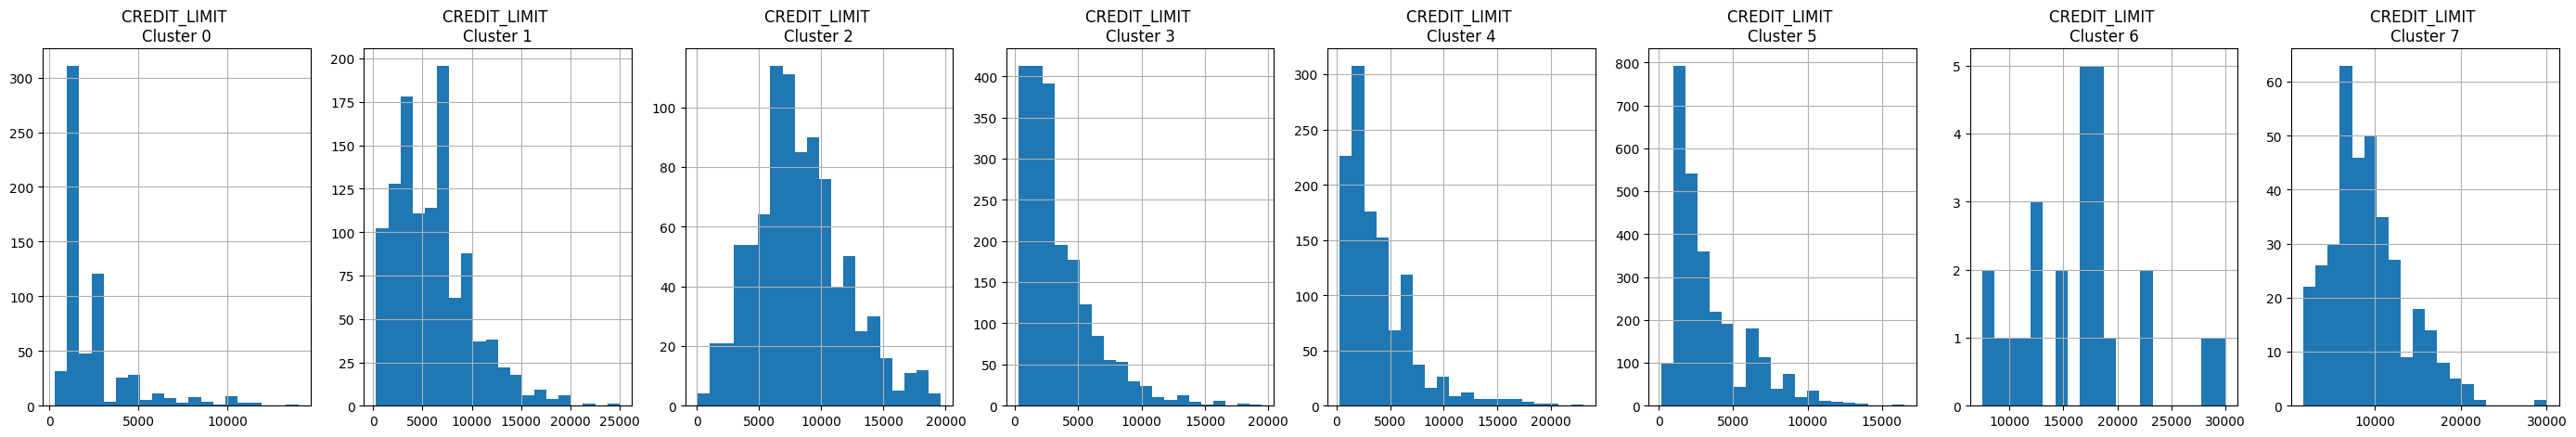

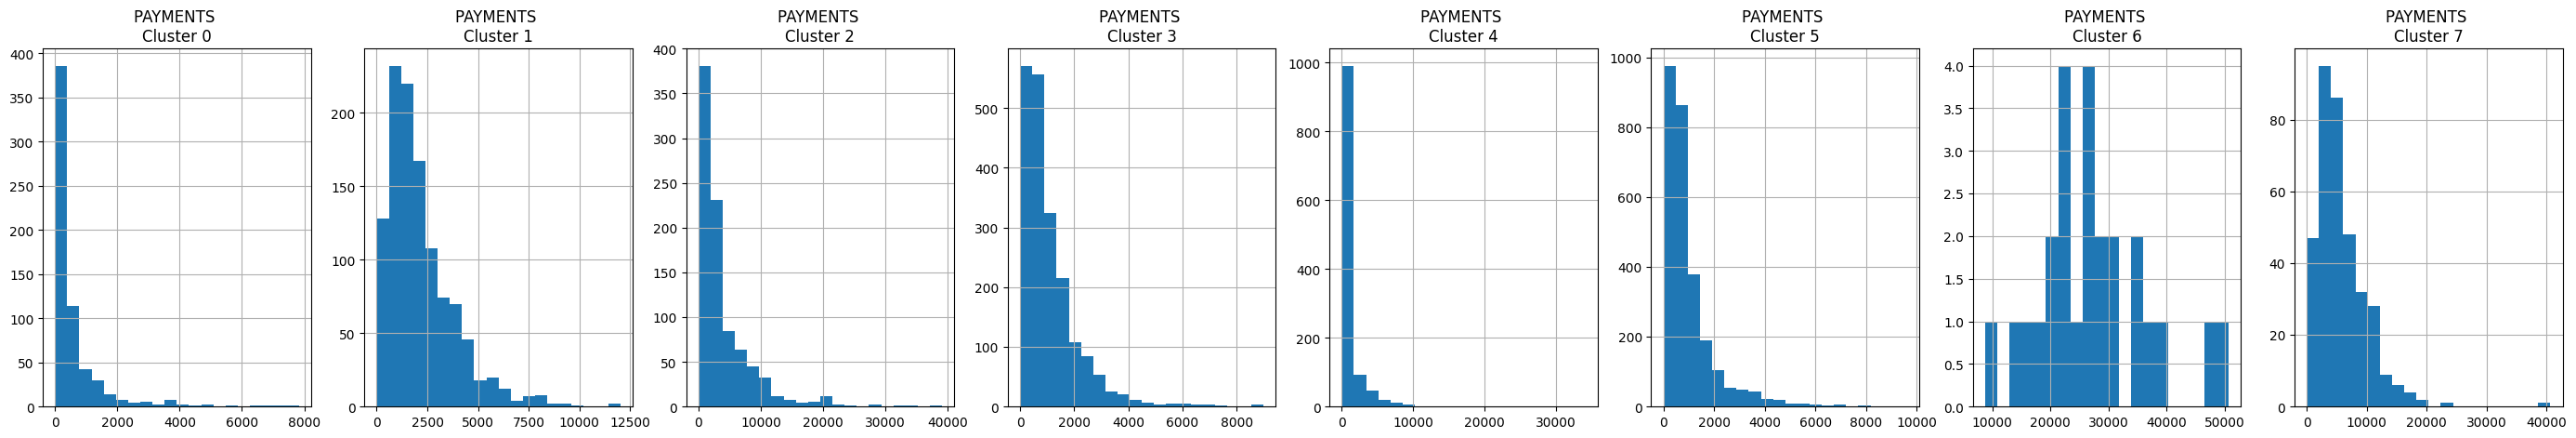

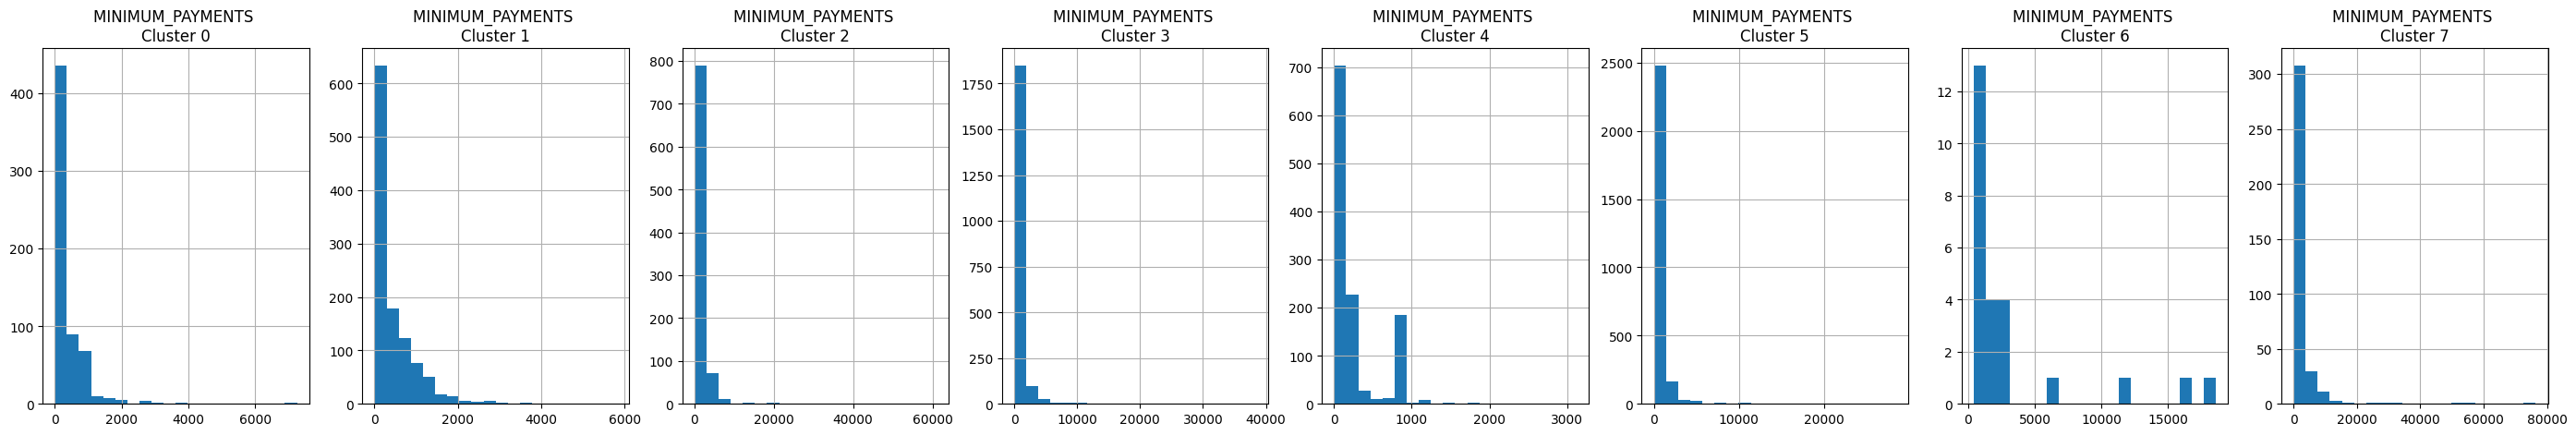

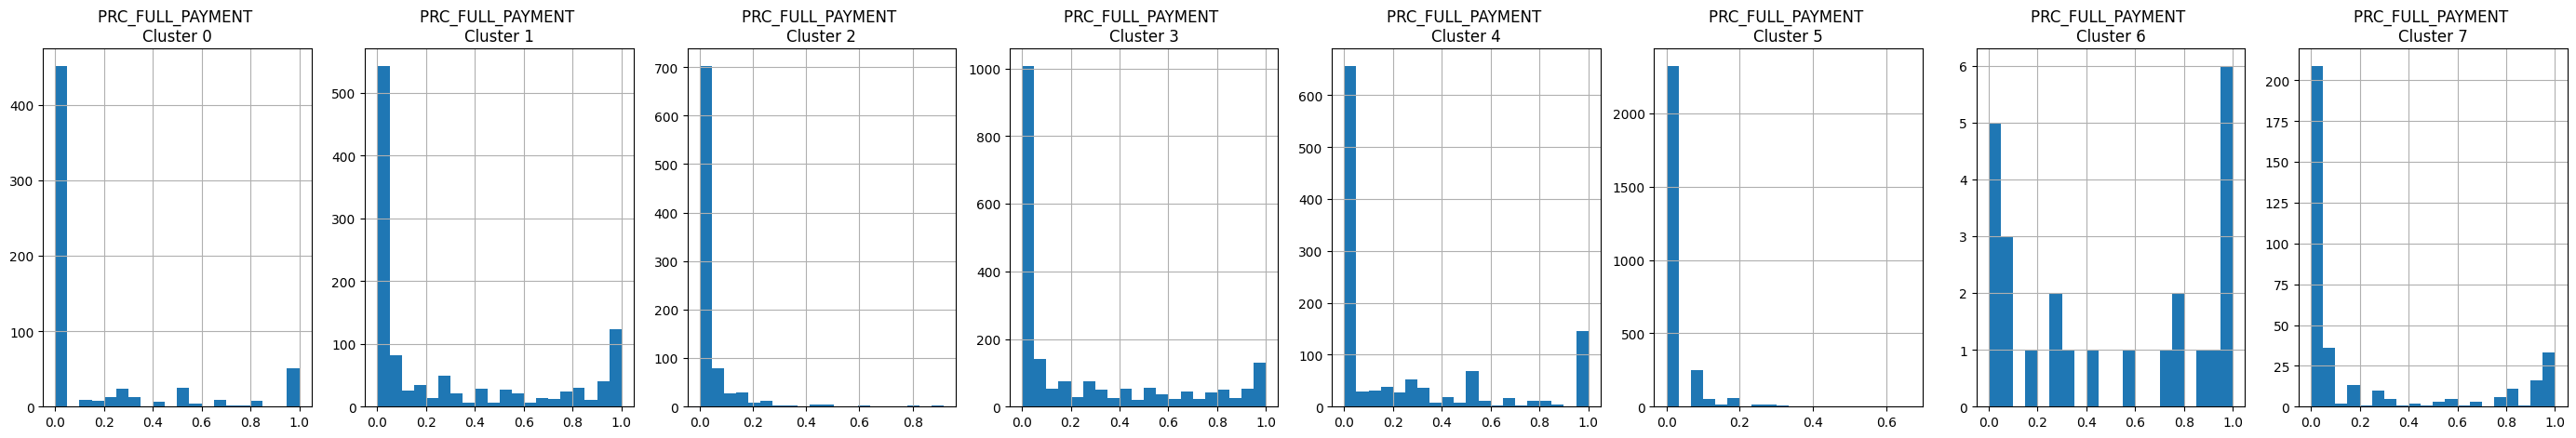

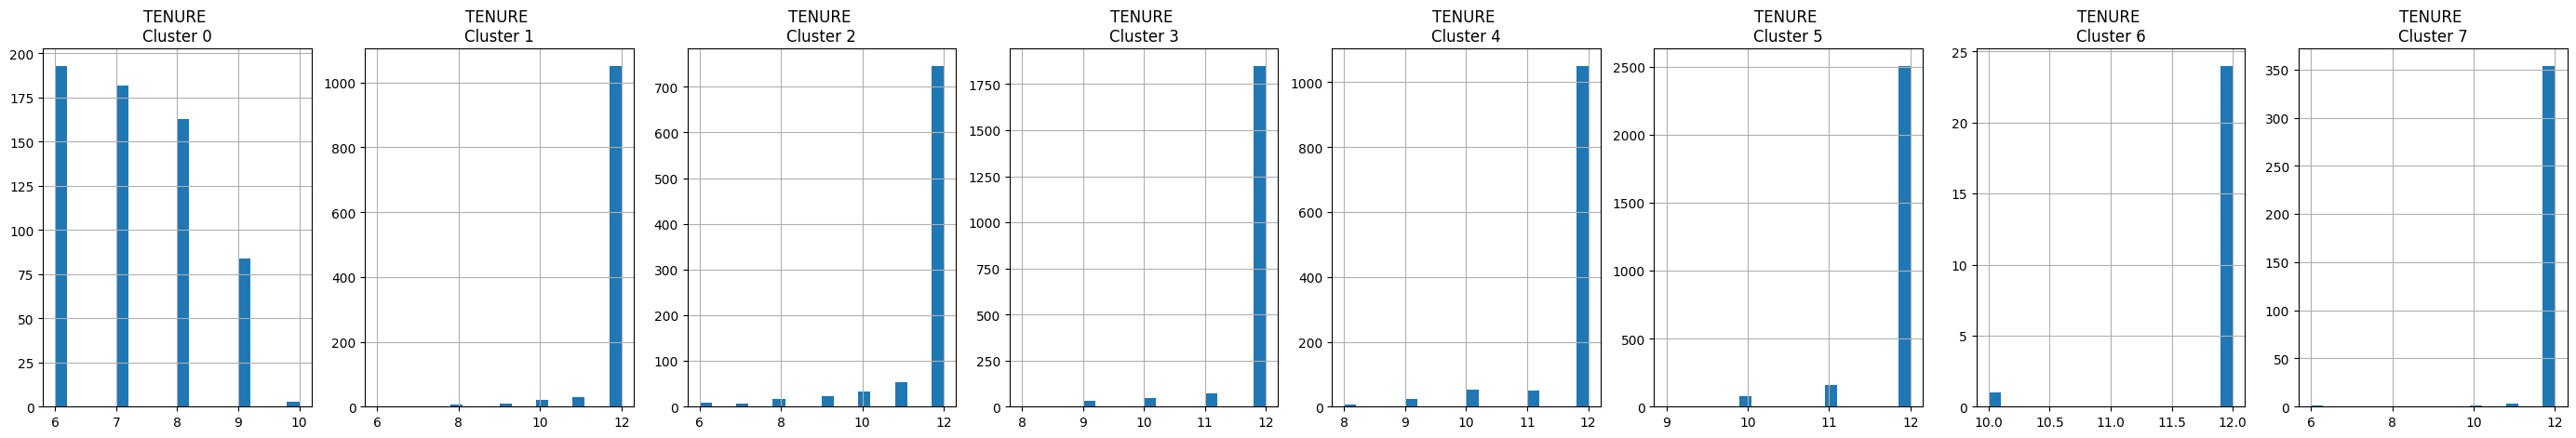

In [35]:
for i in creditCard_df.columns:
  plt.figure(figsize=(35,5))
  for j in range(8):
    plt.subplot(1, 8, j + 1)
    cluster = creditCard_df_cluster[creditCard_df_cluster["cluster"] == j]
    cluster[i].hist(bins = 20)
    plt.title('{} \nCluster {}'.format(i, j))
  plt.show()

In [36]:
credit_ordered = creditCard_df_cluster.sort_values(by = "cluster")
credit_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
8949,372.708075,0.666667,1093.25,1093.25,0.0,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6,0
7095,164.512820,0.333333,0.00,0.00,0.0,145.563558,0.000000,0.000000,0.000000,0.166667,1,0,1200.0,1055.203377,18.900471,0.00,6,0
8581,417.444057,0.666667,0.00,0.00,0.0,708.715173,0.000000,0.000000,0.000000,0.333333,7,0,1200.0,27.397306,118.174297,0.00,6,0
8579,460.081479,0.833333,649.50,0.00,649.5,793.822988,0.833333,0.000000,0.833333,0.666667,6,6,1000.0,625.116471,87.938730,0.25,6,0
7097,5.310611,0.250000,234.00,0.00,234.0,0.000000,0.625000,0.000000,0.625000,0.000000,0,6,1500.0,303.704799,19.894581,0.00,8,0


In [37]:
credit_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
5089,1848.758853,1.0,3588.13,399.76,3188.37,0.000000,1.000000,0.583333,1.0,0.000000,0,62,6700.0,4923.193295,413.007713,0.0,12,7
1817,9303.557117,1.0,6133.01,4045.67,2087.34,1895.608770,1.000000,1.000000,1.0,0.833333,23,115,12500.0,4054.579469,2998.465025,0.0,12,7
4462,4976.028578,1.0,900.87,0.00,900.87,0.000000,1.000000,0.000000,1.0,0.000000,0,162,5500.0,92.865469,50260.759470,0.0,12,7
3093,6773.941979,1.0,14215.00,14215.00,0.00,464.795495,0.583333,0.583333,0.0,0.083333,1,30,9000.0,5773.661106,6338.527589,0.0,12,7
1411,4007.323260,1.0,3333.95,1317.01,2016.94,513.286838,1.000000,0.500000,1.0,0.083333,2,91,6000.0,6967.667428,2158.446633,0.0,12,7


In [38]:
credit_ordered.to_csv("cluster.csv")

## Aplicação de PCA(principal component  analysis) e visualizacão dos resultados

In [39]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditCard_df_scaled)
principal_comp

array([[-1.68221894, -1.07645174],
       [-1.13828777,  2.50647475],
       [ 0.96967842, -0.38351347],
       ...,
       [-0.92620451, -1.81078731],
       [-2.33655211, -0.65796859],
       [-0.55642536, -0.40046417]])

In [40]:
pca_df = pd.DataFrame(data = principal_comp, columns=["pca1", "pca2"])
pca_df.head()

,pca1,pca2
0,-1.682219,-1.076452
1,-1.138288,2.506475
2,0.969678,-0.383513
3,-0.873623,0.043163
4,-1.599434,-0.688581


In [41]:
pca_df = pd.concat([pca_df, pd.DataFrame({"cluster": labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682219,-1.076452,5
1,-1.138288,2.506475,2
2,0.969678,-0.383513,1
3,-0.873623,0.043163,5
4,-1.599434,-0.688581,5


<Axes: xlabel='pca1', ylabel='pca2'>

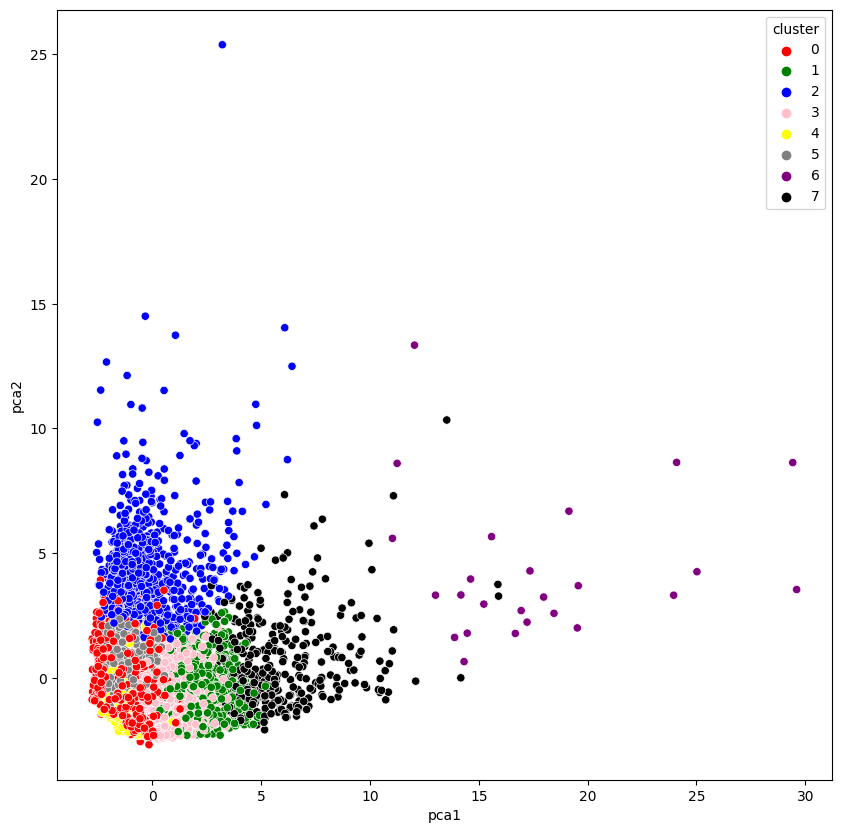

In [44]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="pca1", y="pca2", hue="cluster", data = pca_df, palette = ["red", "green", "blue", "pink", "yellow", "gray", "purple", "black"])

## Aplicação de autoencoders

In [46]:
creditCard_df_scaled.shape

(8950, 17)

In [47]:
#17 -> 500 -> 2000 -> 10 -> 2000 -> 500 -> 17
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [49]:
input_df = Input(shape=(17,))
x = Dense(500, activation="relu")(input_df)
x = Dense(2000, activation="relu")(x)

encoded = Dense(10, activation="relu")(x)

x = Dense(2000, activation="relu")(encoded)
x = Dense(500, activation="relu")(x)

decoded = Dense(17)(x)

In [50]:
autoencoder = Model(input_df, decoded)

In [51]:
encoder = Model(input_df, encoded)

In [52]:
autoencoder.compile(optimizer = "Adam", loss = "mean_squared_error")

In [53]:
autoencoder.fit(creditCard_df_scaled, creditCard_df_scaled, epochs = 50)

Epoch 1/50
280/280 [==============================] - 11s 34ms/step - loss: 0.2495
Epoch 2/50
280/280 [==============================] - 8s 27ms/step - loss: 0.1294
Epoch 3/50
280/280 [==============================] - 9s 34ms/step - loss: 0.0912
Epoch 4/50
280/280 [==============================] - 9s 32ms/step - loss: 0.0901
Epoch 5/50
280/280 [==============================] - 8s 30ms/step - loss: 0.0833
Epoch 6/50
280/280 [==============================] - 9s 33ms/step - loss: 0.0721
Epoch 7/50
280/280 [==============================] - 8s 28ms/step - loss: 0.0792
Epoch 8/50
280/280 [==============================] - 10s 36ms/step - loss: 0.0606
Epoch 9/50
280/280 [==============================] - 11s 40ms/step - loss: 0.0640
Epoch 10/50
280/280 [==============================] - 9s 31ms/step - loss: 0.0590
Epoch 11/50
280/280 [==============================] - 10s 35ms/step - loss: 0.0596
Epoch 12/50
280/280 [==============================] - 9s 33ms/step - loss: 0.0597
Epoch 13/

In [54]:
creditCard_df_scaled.shape

(8950, 17)

In [55]:
compact = encoder.predict(creditCard_df_scaled)

280/280 [==============================] - 2s 7ms/step


In [56]:
compact.shape

(8950, 10)

In [57]:
creditCard_df_scaled[0]

array([-0.73198937, -0.24943448, -0.42489974, -0.35693402, -0.34907882,
       -0.46678555, -0.80649035, -0.67866081, -0.70731317, -0.67534886,
       -0.47606982, -0.51133325, -0.96043334, -0.52897879, -0.31096755,
       -0.52555097,  0.36067954])

In [58]:
compact[0]

array([0.35200652, 0.33249015, 0.4895954 , 0.        , 0.        ,
       0.        , 0.6450741 , 0.7917509 , 0.        , 0.        ],
      dtype=float32)

In [59]:
wcss_2 = []
range_values = range(1,20)
for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(compact)
  wcss_2.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

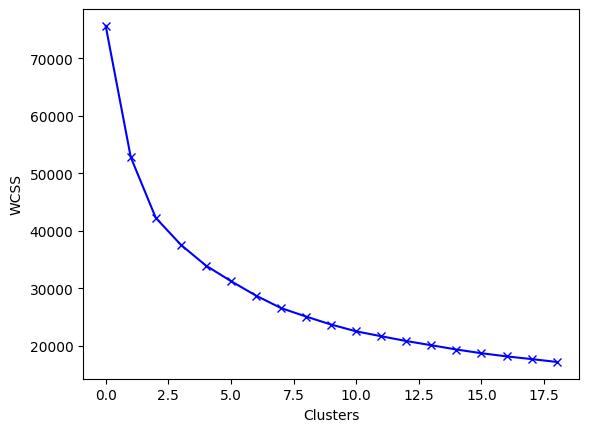

In [61]:
plt.plot(wcss_2, "bx-")
plt.xlabel("Clusters")
plt.ylabel("WCSS");

<ipython-input-62-e11deaa6c6f0>:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(wcss_1, "bx-", color = "r")
<ipython-input-62-e11deaa6c6f0>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(wcss_2, "bx-", color = "g")


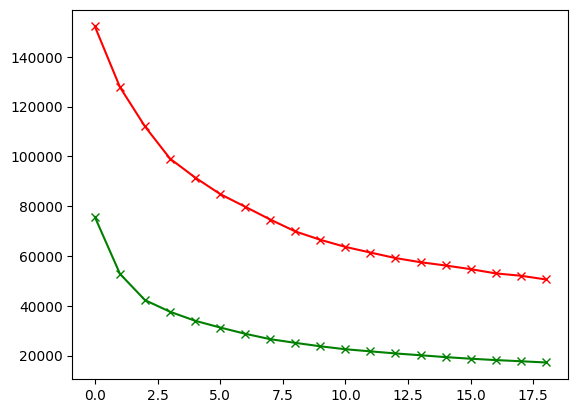

In [62]:
plt.plot(wcss_1, "bx-", color = "r")
plt.plot(wcss_2, "bx-", color = "g")

In [63]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(compact)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [64]:
labels = kmeans.labels_
labels, labels.shape

(array([0, 2, 0, ..., 2, 2, 2], dtype=int32), (8950,))

In [65]:
df_cluster_at = pd.concat([creditCard_df, pd.DataFrame({"cluster": labels})],axis = 1)
df_cluster_at.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [66]:
pca = PCA(n_components = 2)
prin_comp = pca.fit_transform(compact)
pca_df = pd.DataFrame(data = prin_comp, columns = ["pca1", "pca2"])
pca_df.head()

,pca1,pca2
0,-1.624987,0.030739
1,0.883175,-1.438605
2,-0.470740,0.524109
3,-1.143673,-0.103090
4,-1.676444,0.058221


In [68]:
pca_df = pd.concat([pca_df, pd.DataFrame({"cluster": labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.624987,0.030739,0
1,0.883175,-1.438605,2
2,-0.470740,0.524109,0
3,-1.143673,-0.103090,0
4,-1.676444,0.058221,0


<Axes: xlabel='pca1', ylabel='pca2'>

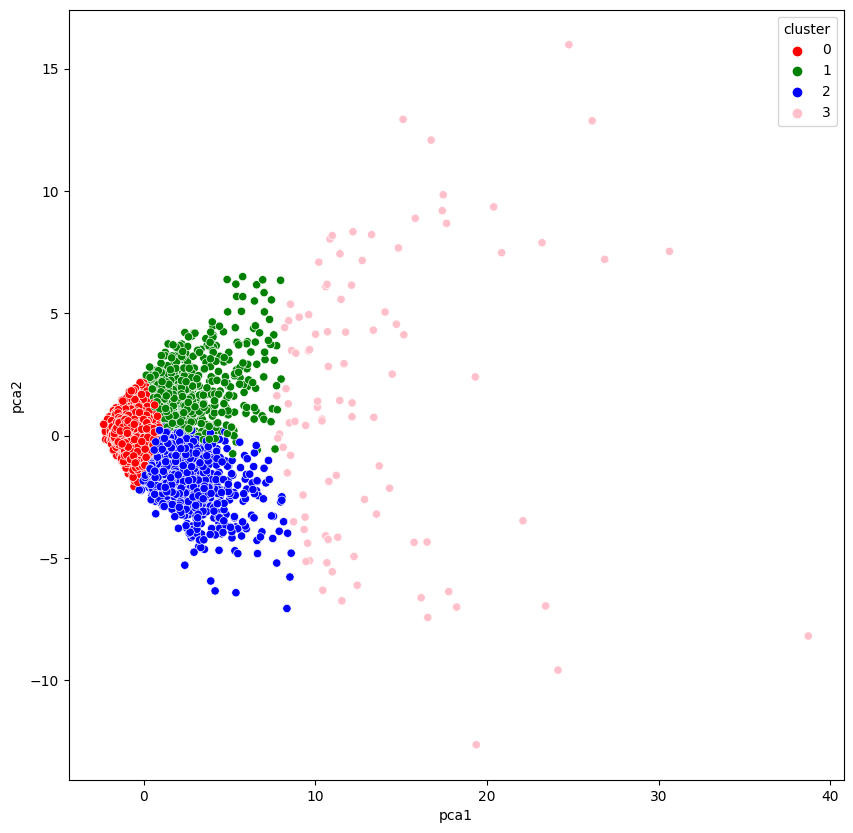

In [70]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="pca1", y="pca2", hue="cluster", data = pca_df, palette = ["red", "green", "blue", "pink"])

In [71]:
df_cluster_ordered = df_cluster_at.sort_values(by = "cluster")
df_cluster_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.0,95.40,0.000000,0.166667,0.0,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
5669,1163.135011,1.000000,0.00,0.0,0.00,884.506039,0.000000,0.0,0.000000,0.166667,6,0,1200.0,222.485191,420.701352,0.000000,12,0
5668,0.734665,0.777778,254.23,0.0,254.23,0.000000,0.555556,0.0,0.555556,0.000000,0,5,1500.0,0.000000,864.206542,0.000000,9,0
5667,897.877807,1.000000,1758.75,0.0,1758.75,2557.126189,0.583333,0.0,0.416667,0.416667,10,7,6000.0,3349.425019,243.137378,0.363636,12,0
5664,35.771638,1.000000,443.04,0.0,443.04,0.000000,1.000000,0.0,1.000000,0.000000,0,12,1500.0,404.189925,151.005361,1.000000,12,0


In [72]:
df_cluster_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
8026,5134.553859,1.000000,2502.34,669.00,1833.34,0.00000,0.833333,0.083333,0.833333,0.000000,0,67,6000.0,528.134435,25312.160690,0.000000,12,3
697,4414.952906,1.000000,419.64,0.00,419.64,0.00000,1.000000,0.000000,1.000000,0.000000,0,12,4200.0,467.204852,24302.098190,0.000000,12,3
71,2990.422186,0.909091,4523.27,1664.09,2859.18,27296.48576,0.666667,0.500000,0.583333,0.833333,27,33,7000.0,28232.694460,1107.030803,0.454545,12,3
4282,2004.816462,1.000000,20747.34,13007.07,7740.27,0.00000,1.000000,1.000000,1.000000,0.000000,0,95,10000.0,17005.409690,410.800069,1.000000,12,3
2454,10915.550750,1.000000,0.00,0.00,0.00,23130.82106,0.000000,0.000000,0.000000,0.583333,23,0,15000.0,18341.954670,3127.192305,0.000000,12,3


In [79]:
df_cluster_ordered.to_excel("cluster_ordered.xls")

<ipython-input-79-c874924d6c9e>:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df_cluster_ordered.to_excel("cluster_ordered.xls")
